In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


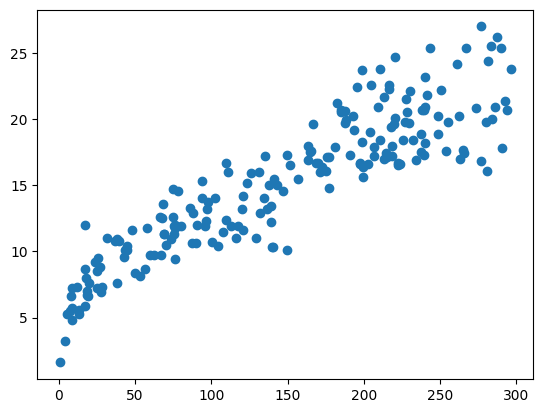

In [3]:
plt.scatter(data["TV"], data["Sales"])

In [23]:
def covariance(x: pd.Series, y: pd.Series):
    """
    Calcula la covarianza dadas 2 series de input
    """
    mu_x = x.mean()
    mu_y = y.mean()
    N = len(x)
    return sum([(x[i] - mu_x)*(y[i] - mu_y) for i in range(len(x))])/N

def compute_slope(x: pd.Series, y: pd.Series):
    """
    Calcula el coeficiente b1 de la regresión usando y como dependiente y x como dependiente
    """
    return covariance(x, y)/covariance(x, x)

def compute_intercept(x: pd.Series, y: pd.Series, slope: float):
    """
    Calcula el coeficiente b0 de la regresión usando y como dependiente y x como dependiente
    """
    mu_x = x.mean()
    mu_y = y.mean()
    return mu_y - slope*mu_x

def compute_coefs(data: pd.DataFrame, independent_var_name: str, dependent_var_name: str):
    """
    Calcula los coeficientes de la regresión usando un dataframe de entrada
    y los nombres de las columnas independiente y dependiente respectivamente

    Guarda las predicciones en una nueva columna en el dataframe
    """
    independent_var = data[independent_var_name]
    dependent_var = data[dependent_var_name]
    b1 = compute_slope(independent_var, dependent_var)
    b0 = compute_intercept(independent_var, dependent_var, b1)
    data[f"{dependent_var_name}_predictions"] = b0 + b1*independent_var
    return b0, b1

In [24]:
dependent_var_name = "Sales"
independent_var_name = "TV"

b0, b1 = compute_coefs(data, independent_var_name, dependent_var_name)

print("Valor de b0:", b0)
print("Valor de b1:", b1)

Valor de b0: 6.974821488229903
Valor de b1: 0.05546477046955879


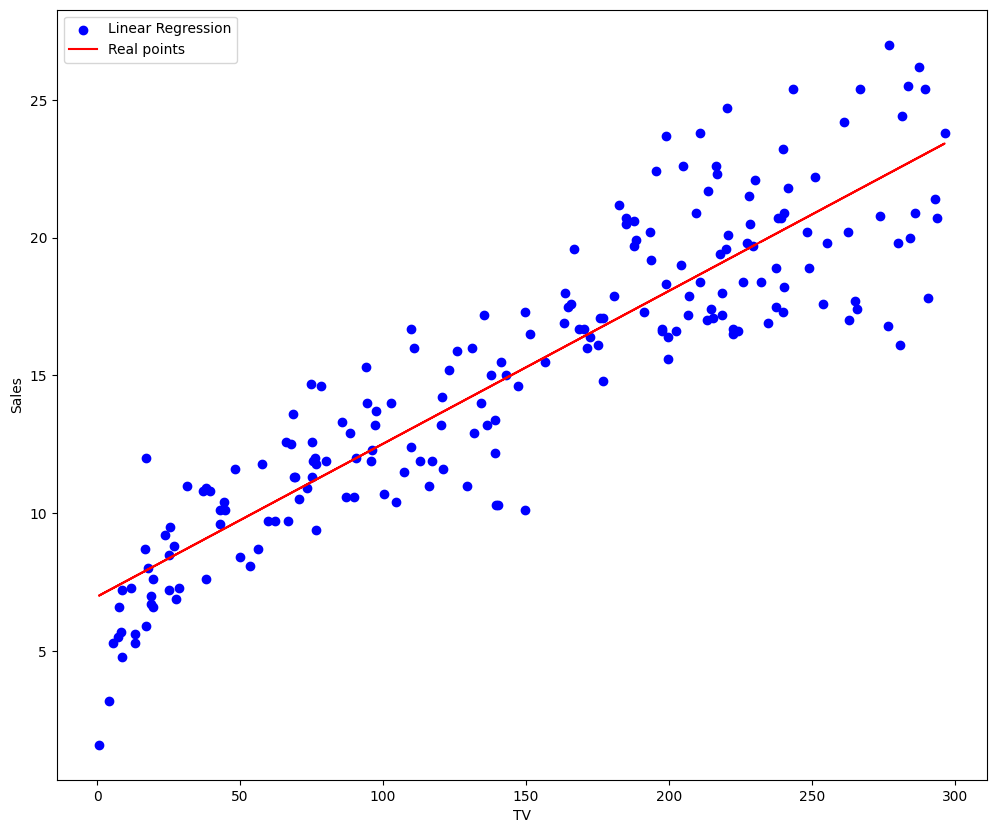

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax.scatter(data["TV"], data["Sales"], c = 'blue', label = "Linear Regression")
ax.plot(data["TV"], data["Sales_predictions"], c = 'red', label = "Real points")
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
ax.legend()